# TP Final - Introducción al aprendizaje automatizado
### Juan Ignacio Farizano

--------------------------------------------------------------------------------

In [2]:
# Para sacar error molesto de tf con gpu: 
# for a in /sys/bus/pci/devices/*; do echo 0 | sudo tee -a $a/numa_node; done

# Imports iniciales
%matplotlib inline
from common import *
from cnn import *
from itertools import product

--------------------------------------------------------------------------------
## Ejercicio 1

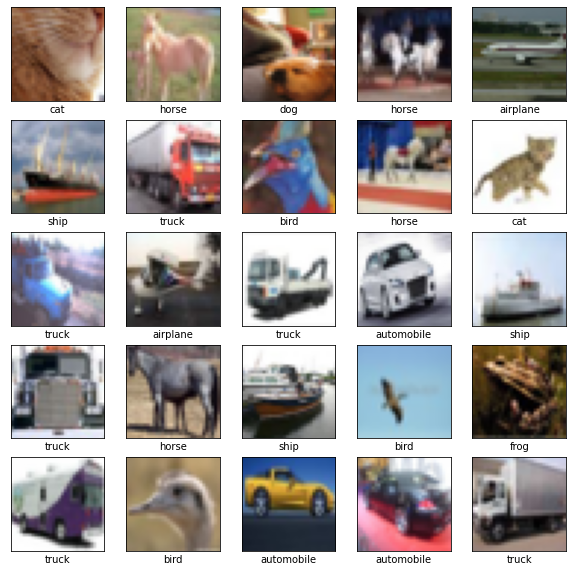

In [3]:
# Cargo el dataset de imágenes cifar10 (función hecha de nuevo en cnn.py para normalizar
# los datos)
X, y, X_test, y_test = load_cifar10_dataset()
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)

# Del tutorial, grafico una grilla con ejemplos de cada clase para tener una idea
# gráfica de lo que se encuentra en el dataset (Además, queda lindo)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [4]:
# Armo la red con las capas pedidas
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Dense(128))
model.add(layers.Dense(128))
model.add(layers.Dense(10))

2022-07-19 17:10:21.481375: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-19 17:10:21.805659: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6787 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:08:00.0, compute capability: 6.1


In [5]:
n_epochs = 50

# Configuro el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# Y lo entreno con el dataset
history = model.fit(X_train, y_train, epochs=n_epochs, 
                    validation_data=(X_val, y_val))

Epoch 1/50


2022-07-19 17:10:22.269429: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 491520000 exceeds 10% of free system memory.
2022-07-19 17:10:22.498269: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 491520000 exceeds 10% of free system memory.
2022-07-19 17:10:23.321305: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8400


1250/1250 [==============================] - 6s 4ms/step - loss: 1.4935 - accuracy: 0.4510 - val_loss: 1.2004 - val_accuracy: 0.5695
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0718 - accuracy: 0.6180 - val_loss: 1.0122 - val_accuracy: 0.6463
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9053 - accuracy: 0.6804 - val_loss: 0.8921 - val_accuracy: 0.6947
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7939 - accuracy: 0.7192 - val_loss: 0.8807 - val_accuracy: 0.6903
Epoch 5/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7104 - accuracy: 0.7479 - val_loss: 0.9199 - val_accuracy: 0.6925
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6272 - accuracy: 0.7778 - val_loss: 0.9070 - val_accuracy: 0.7044
Epoch 7/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5625 - accuracy: 0.8015 - val_loss: 0.9357 - val_accuracy: 0.7025
Epo

Error en train del modelo final: 0.02572500705718994, error en val: 0.30709999799728394, error en test: 0.3125


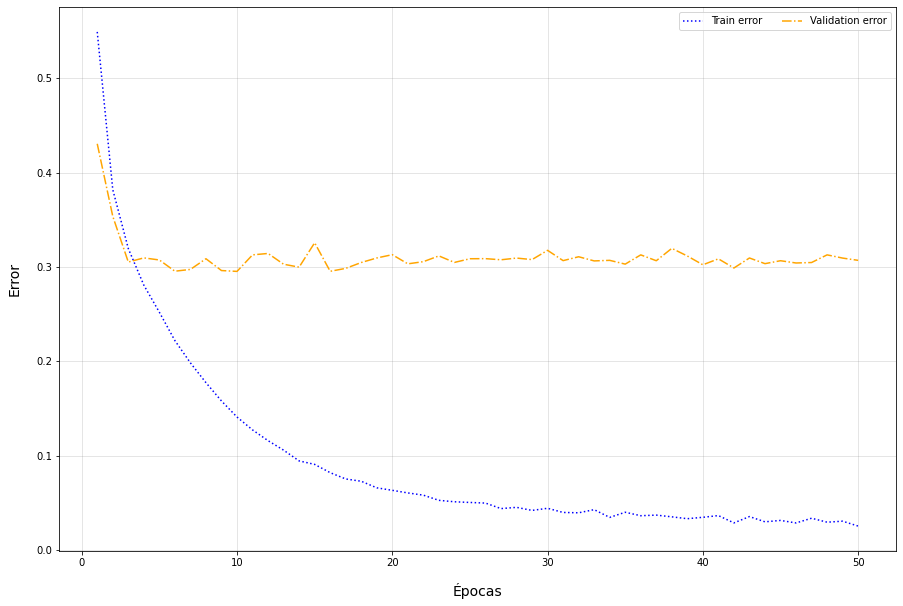

In [6]:
errors = []

for i in range(n_epochs):
  errors.append([1 - history.history['accuracy'][i], i + 1, "Train error" ])
  errors.append([1 - history.history['val_accuracy'][i], i + 1, "Validation error" ])

errors_df = pd.DataFrame(errors, columns = ["Error", "Épocas", "Class"])
graph_errors(errors_df, "Épocas")

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
train_error = 1 - history.history['accuracy'][n_epochs - 1]
val_error = 1 - history.history['val_accuracy'][n_epochs - 1]
test_error = 1 - test_acc
print(f"Error en train del modelo final: {train_error}, error en val: {val_error}, error en test: {test_error}")

### Conclusiones
No hay mucho para comentar ya que este es el primer resultado para este dataset y este modelo, no hay punto de comparación.

Lo que sí se puede observar es que se encuentra un sobreajuste muy notorio y mientras
que los errores de validación y de test no se reducen más, el de entrenamiento sigue disminuyendo.

--------------------------------------------------------------------------------
## Ejercicio 2

2022-07-19 17:15:16.225069: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 491520000 exceeds 10% of free system memory.
2022-07-19 17:15:16.410326: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 491520000 exceeds 10% of free system memory.
2022-07-19 17:18:51.765238: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 491520000 exceeds 10% of free system memory.


,p1,p2,Train error,Validation error,Test error
0,0.0,0.0,0.032425,0.3203,0.3254
1,0.0,0.2,0.035850,0.2979,0.3042
2,0.0,0.5,0.052500,0.3150,0.3230
3,0.2,0.0,0.050225,0.2784,0.2853
4,0.2,0.2,0.053750,0.2690,0.2734
5,0.2,0.5,0.071650,0.2735,0.2840
6,0.5,0.0,0.079600,0.2372,0.2486
7,0.5,0.2,0.086700,0.2500,0.2561
8,0.5,0.5,0.103875,0.2458,0.2536


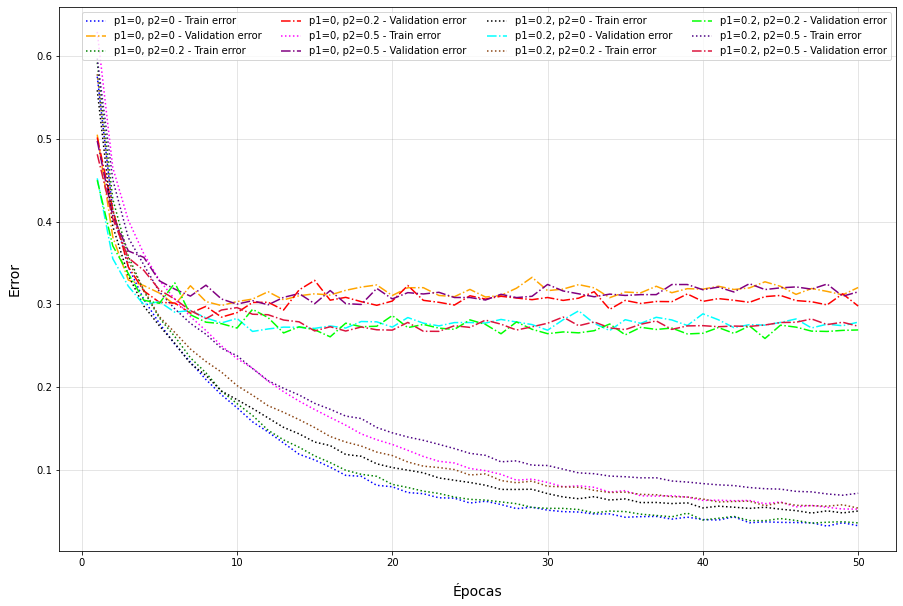

In [7]:
# Cargo el dataset de imágenes cifar10 (función hecha de nuevo en cnn.py para normalizar
# los datos)
X, y, X_test, y_test = load_cifar10_dataset()
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)

n_epochs = 50

errors = []
errors_table = []

# p1: Dropout rate después de la última capa convolucional
# p2: idem pero después de la primera capa densa
# si algún p = 0, no agrego esa capa
for (p1, p2) in product([0, 0.2, 0.5], [0, 0.2, 0.5]):
  # Armo la red con las capas pedidas
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  if p1 > 0:
    model.add(layers.Dropout(p1))
  model.add(layers.Flatten())
  model.add(layers.Dense(64))
  if p2 > 0:
    model.add(layers.Dropout(p2))
  model.add(layers.Dense(128))
  model.add(layers.Dense(128))
  model.add(layers.Dense(10))

  # Configuro el modelo
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  # Y lo entreno con el dataset
  history = model.fit(X_train, y_train, epochs=n_epochs, 
                      validation_data=(X_val, y_val), verbose=0)

  for i in range(n_epochs):
    errors.append([1 - history.history['accuracy'][i], i + 1, f"p1={p1}, p2={p2} - Train error" ])
    errors.append([1 - history.history['val_accuracy'][i], i + 1, f"p1={p1}, p2={p2} - Validation error" ])

  test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
  train_error = 1 - history.history['accuracy'][n_epochs - 1]
  val_error = 1 - history.history['val_accuracy'][n_epochs - 1]
  test_error = 1 - test_acc
  errors_table.append([p1, p2, train_error, val_error, test_error])

errors_df = pd.DataFrame(errors, columns = ["Error", "Épocas", "Class"])
graph_errors(errors_df, "Épocas")
errors_table_df = pd.DataFrame(errors_table, columns = ["p1", "p2", "Train error", "Validation error", "Test error"])
display(errors_table_df)

### Conclusiones

Para este ejercicio traté de ser lo más exhaustivo posible, probando las diferentes combinaciones de valores
de p para las capas de dropout, agregando ambas en simúlteano, una a la vez o ninguna (siendo en este último caso igual al modelo creado en el ejercicio 1).

En el gráfico se puede ver que los errores se mantiene similares entre sí, al variar entre los diferentes
valores de p dados los diferencias son pequeñas, incluso comparando contra el modelo sin ninguna capa de dropout, con ellas empieza a haber una diferencia pero por sí mismas no son suficientes.

El sobreajuste sigue siendo notable.

Para el siguiente ejercicio me quedo con la combinación que dió menor error de test,
siendo una capa de dropout después de la última capa convolucional con un p de 0.5
y sin capa de dropout después de la primera capa densa.

--------------------------------------------------------------------------------
## Ejercicio 3

Error en train del modelo final: 0.24142497777938843, error en val: 0.21219998598098755, error en test: 0.2314000129699707


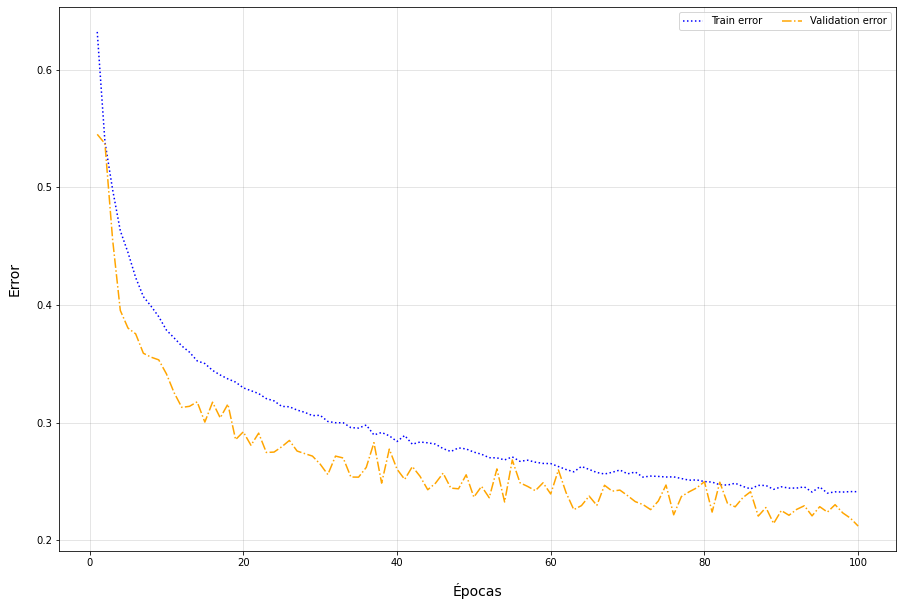

In [8]:
# Cargo el dataset de imágenes cifar10 (función hecha de nuevo en cnn.py para normalizar
# los datos)
X, y, X_test, y_test = load_cifar10_dataset()
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)

n_epochs = 100

errors = []

# p: Dropout rate después de la última capa convolucional
p = 0.5

# Capas de data augmentation
img_height = 32
img_width = 32
data_augmentation = tf.keras.Sequential(
    [
          layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
          layers.RandomRotation(0.1),
          layers.RandomZoom(0.1),
     ]
)

# Armo la red con las capas pedidas
model = models.Sequential()
model.add(data_augmentation)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Dropout(p))
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Dense(128))
model.add(layers.Dense(128))
model.add(layers.Dense(10))

# Configuro el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# Y lo entreno con el dataset
history = model.fit(X_train, y_train, epochs=n_epochs, 
                    validation_data=(X_val, y_val), verbose=0)

for i in range(n_epochs):
  errors.append([1 - history.history['accuracy'][i], i + 1, "Train error" ])
  errors.append([1 - history.history['val_accuracy'][i], i + 1, "Validation error" ])

errors_df = pd.DataFrame(errors, columns = ["Error", "Épocas", "Class"])
graph_errors(errors_df, "Épocas")

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
train_error = 1 - history.history['accuracy'][n_epochs - 1]
val_error = 1 - history.history['val_accuracy'][n_epochs - 1]
test_error = 1 - test_acc
print(f"Error en train del modelo final: {train_error}, error en val: {val_error}, error en test: {test_error}")

### Conclusiones

Agregando la capa de data augmentation se puede ver en el gráfico que deja de haber sobreajuste.

Los errores de validación y test no variaron mucho, siendo apenas disminuidos. Pero puedo suponer
que a partir de esta mejora con la nueva capa, me permite entrenar el modelo durante una cantidad
mucho mayor de épocas al haber eliminado el sobreajuste, pudiendo llegar a mejores resultados
en el futuro.

Ahora mismo, la capa de data augmentation no realiza muchas modificaciones, pero estas fueron
las suficientes para que el modelo no entrene siempre sobre exactamente las mismas imágenes, se elimine el sobreajuste y empiece a generalizar mejor. Por ejemplo, puede empezar a reconocer aviones reconociendo sus partes en diferentes ubicaciones, ángulos, zooms, etc, así en vez de reconocerlos siempre a partir desde la 
misma imagen o imágenes, pueda hacerlo con diferentes.